In [1]:
import numpy as np
import pandas as pd

In [44]:
train = pd.read_csv('train.csv',parse_dates=['Datetime'])
test = pd.read_csv('test.csv',parse_dates=['Datetime'])

In [45]:
print train.shape
print test.shape

(881876, 8)
(266248, 6)


In [46]:
item_count_train = train.Item_ID.value_counts().to_dict()
item_count_test = test.Item_ID.value_counts().to_dict()

train['item_count'] = train['Item_ID'].map(item_count_train)
test['item_count'] = test['Item_ID'].map(item_count_test)

train['dayofweek'] = train.Datetime.dt.dayofweek
test['dayofweek'] = test.Datetime.dt.dayofweek

train['weekyear'] = train.Datetime.dt.weekofyear
test['weekyear'] = test.Datetime.dt.weekofyear

train['dayofmonth'] = train.Datetime.dt.day
test['dayofmonth'] = test.Datetime.dt.day

#train['is_quarter_start'] = train.Datetime.dt.is_quarter_start
#test['is_quarter_start'] = test.Datetime.dt.is_quarter_start

#train['is_quarter_start'] = train.is_quarter_start.astype(int)
#test['is_quarter_start'] = test.is_quarter_start.astype(int)

train['month'] = train.Datetime.dt.month
test['month'] = test.Datetime.dt.month

In [47]:
train = train.loc[train['Number_Of_Sales'] <= 340000]

In [48]:
med_price = train.groupby('Item_ID')['Price'].aggregate(np.median).reset_index()
med_price.rename(columns={'Price':'medByID'},inplace=True)

med_sales = train.groupby('Item_ID')['Number_Of_Sales'].aggregate(np.median).reset_index()
med_sales.rename(columns={'Number_Of_Sales':'medBySales'},inplace=True)

catone_med_price = train.groupby('Category_1')['Price'].aggregate(np.median).reset_index()
catone_med_price.rename(columns={'Price':'medCatOnePrice'},inplace=True)

catone_med_sales = train.groupby('Category_1')['Number_Of_Sales'].aggregate(np.median).reset_index()
catone_med_sales.rename(columns={'Number_Of_Sales':'medCatOneSales'},inplace=True)

cattwo_med_price = train.groupby('Category_2')['Price'].aggregate(np.median).reset_index()
cattwo_med_price.rename(columns={'Price':'medCatTwoPrice'},inplace=True)

cattwo_med_sales = train.groupby('Category_2')['Number_Of_Sales'].aggregate(np.median).reset_index()
cattwo_med_sales.rename(columns={'Number_Of_Sales':'medCatTwoSales'},inplace=True)

week_year_price = train.groupby(['Item_ID','weekyear'])['Price'].aggregate(np.median).reset_index()
week_year_price.rename(columns={'Price':'weekYearIDPrice'},inplace=True)

week_year_sales = train.groupby(['Item_ID','weekyear'])['Number_Of_Sales'].aggregate(np.median).reset_index()
week_year_sales.rename(columns={'Number_Of_Sales':'weekYearIDSales'},inplace=True)


In [49]:
train = pd.merge(train, med_price, on='Item_ID', how='left')
train = pd.merge(train, med_sales, on='Item_ID', how='left')
train = pd.merge(train, catone_med_price, on='Category_1', how='left')
train = pd.merge(train, catone_med_sales, on='Category_1', how='left')
train = pd.merge(train, cattwo_med_sales, on='Category_2', how='left')
train = pd.merge(train, cattwo_med_price, on='Category_2', how='left')
train = pd.merge(train, week_year_price, on=['Item_ID','weekyear'], how='left')
train = pd.merge(train, week_year_sales, on=['Item_ID','weekyear'], how='left')


test = pd.merge(test, med_price, on='Item_ID', how='left')
test = pd.merge(test, med_sales, on='Item_ID', how='left')
test = pd.merge(test, catone_med_price, on='Category_1', how='left')
test = pd.merge(test, catone_med_sales, on='Category_1', how='left')
test = pd.merge(test, cattwo_med_sales, on='Category_2', how='left')
test = pd.merge(test, cattwo_med_price, on='Category_2', how='left')
test = pd.merge(test, week_year_price, on=['Item_ID','weekyear'], how='left')
test = pd.merge(test, week_year_sales, on=['Item_ID','weekyear'], how='left')


In [50]:
train['volumebyCat1'] = train['Price'] * train ['Number_Of_Sales']
volumne_by_cat1 = train.groupby('Category_1')['volumebyCat1'].aggregate(np.median).reset_index()
train.drop('volumebyCat1', inplace=True, axis=1)

train = pd.merge(train, volumne_by_cat1, on='Category_1', how='left')
test = pd.merge(test, volumne_by_cat1, on='Category_1', how='left')

In [51]:
train['volumebyCat2'] = train['Price'] * train['Number_Of_Sales']
volumne_by_cat2 = train.groupby('Category_2')['volumebyCat2'].aggregate(np.median).reset_index()
train.drop('volumebyCat2', inplace=True, axis=1)

train = pd.merge(train, volumne_by_cat2, on='Category_2', how='left')
test = pd.merge(test, volumne_by_cat2, on='Category_2', how='left')

In [52]:
cols = ['medByID',
'medBySales',
'medCatOnePrice',
'medCatOneSales',
'medCatTwoSales',
'medCatTwoPrice',
'volumebyCat1',
'volumebyCat2']

for x in cols:
    train[x] = np.log1p(train[x]+10)
    
for x in cols:
    test[x] = np.log1p(test[x]+10)

In [53]:
train.describe()

,Item_ID,Category_3,Category_2,Category_1,Price,Number_Of_Sales,item_count,dayofweek,weekyear,dayofmonth,...,medByID,medBySales,medCatOnePrice,medCatOneSales,medCatTwoSales,medCatTwoPrice,weekYearIDPrice,weekYearIDSales,volumebyCat1,volumebyCat2
count,881871.000000,881871.000000,790263.000000,881871.000000,881871.000000,881871.000000,881871.000000,881871.000000,881871.000000,881871.000000,...,881871.000000,881871.000000,881871.000000,881871.000000,790263.000000,790263.000000,881871.000000,881871.000000,881871.000000,790263.000000
mean,30517.398601,0.162507,2.755723,186.924195,5.484042,1198.546469,718.042665,2.999887,24.916525,15.823224,...,2.592266,5.602685,2.546974,5.494873,5.617950,2.442185,5.230364,1137.014733,5.012322,4.829447
std,487.892350,0.368915,1.263769,130.754489,22.472658,7676.935304,217.564430,1.998496,15.072290,8.794396,...,0.426996,1.524918,0.327296,0.882989,0.391727,0.020775,21.084642,6777.511685,1.391746,0.650547
min,29654.000000,0.000000,1.000000,0.000000,0.030000,1.000000,5.000000,0.000000,1.000000,1.000000,...,2.400619,2.484907,2.400619,2.772589,5.141664,2.416360,0.030000,1.000000,2.678759,3.725934
25%,30107.000000,0.000000,2.000000,70.000000,0.125000,69.000000,597.000000,1.000000,12.000000,8.000000,...,2.409464,4.499810,2.409464,5.068904,5.209486,2.419479,0.136000,78.000000,3.851891,3.792338
50%,30518.000000,0.000000,3.000000,176.000000,0.513000,239.000000,790.000000,3.000000,23.000000,16.000000,...,2.440781,5.590987,2.441303,5.513429,5.852202,2.431330,0.501000,260.000000,4.991996,5.111867
75%,30929.000000,0.000000,4.000000,307.000000,2.070000,746.000000,912.000000,5.000000,38.000000,23.000000,...,2.563256,6.680855,2.497082,6.079933,6.061457,2.456507,2.065500,771.000000,5.813270,5.235931
max,31375.000000,1.000000,5.000000,413.000000,424.148000,335952.000000,912.000000,6.000000,53.000000,31.000000,...,5.729190,12.340949,5.155318,8.326759,6.061457,2.474520,399.507000,292848.000000,9.132314,5.363531


In [54]:
print train.shape
print test.shape

(881871, 23)
(266248, 21)


### Decision Tree training

In [55]:
cols_to_use = ['Category_3','Category_2','Category_1','dayofweek','weekyear',\
              'dayofmonth','month','medByID','medBySales','medCatOnePrice',\
              'medCatOneSales','medCatTwoSales','medCatTwoPrice','volumebyCat1','volumebyCat2',\
              'weekYearIDSales','weekYearIDPrice']

In [56]:
train.fillna(-1, inplace=True)
test.fillna(-1, inplace=True)

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
DT = DecisionTreeRegressor(max_depth = 6, min_samples_split=11, criterion='mse',max_features='auto')
DT.fit(train[cols_to_use], np.log1p(train['Price']))
dtpred = DT.predict(test[cols_to_use])
dtpred = np.exp(dtpred)-1

In [21]:
DT2 = DecisionTreeRegressor(max_depth = 6, min_samples_split=11, criterion='mse',max_features='auto')
DT2.fit(train[cols_to_use], np.log1p(train['Number_Of_Sales']))
dtpred2 = DT2.predict(test[cols_to_use])
dtpred2 = np.exp(dtpred2)-1


In [22]:
subpy1 = pd.DataFrame({'ID':test['ID'], 'Price':dtpred, 'Number_Of_Sales':dtpred2})
subpy1.to_csv("subpy1.csv", index=False)

### Set validation

In [57]:
train_X = train.loc[(train['Datetime'] < "2016-01-01") & (train['Datetime'] >= "2015-01-01")]
valid_X = train.loc[train['Datetime'] >= '2016-01-01']

In [58]:
print train_X.shape
print valid_X.shape

(398544, 23)
(259706, 23)


In [21]:
train_X['Datetime'].describe()

count                  398544
unique                    365
top       2015-12-11 00:00:00
freq                     1371
first     2015-01-01 00:00:00
last      2015-12-31 00:00:00
Name: Datetime, dtype: object

### XGBoost

In [23]:
import xgboost as xgb

/home/manish/anaconda2/envs/package15/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
dtrain1 = xgb.DMatrix(data=train_X[cols_to_use], label = np.log1p(train_X['Price']))
dvalid1 = xgb.DMatrix(data=valid_X[cols_to_use], label = np.log1p(valid_X['Price']))

dtrain2 = xgb.DMatrix(data=train_X[cols_to_use], label = np.log1p(train_X['Number_Of_Sales']))
dvalid2 = xgb.DMatrix(data=valid_X[cols_to_use], label = np.log1p(valid_X['Number_Of_Sales']))

In [60]:
dtest = xgb.DMatrix(data=test[cols_to_use])

In [61]:
xgb_params1 = {
    'colsample_bytree': 1,
    'subsample': 1,
    'eta': 0.1,
    'objective': 'reg:linear',
    'max_depth': 6,
    'min_child_weight': 10,
    'eval_metric': 'rmse',
    'alpha':8
}

xgb_params2 = {
    'colsample_bytree': 1,
    'subsample': 1,
    'eta': 0.1,
    'objective': 'reg:linear',
    'max_depth': 6,
    'min_child_weight': 0,
    'eval_metric': 'rmse',
    'alpha':8
}
watchlist1  = [ (dtrain1,'train'),(dvalid1,'valid')]
watchlist2  = [ (dtrain2,'train'),(dvalid2,'valid')]


In [63]:
bst1 = xgb.train(xgb_params1, dtrain1, 1000, watchlist1, early_stopping_rounds=40, verbose_eval=20)

[0]	train-rmse:0.979466	valid-rmse:0.957138
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 40 rounds.
[20]	train-rmse:0.198641	valid-rmse:0.249026
[40]	train-rmse:0.143929	valid-rmse:0.257993
[60]	train-rmse:0.135458	valid-rmse:0.27749
Stopping. Best iteration:
[26]	train-rmse:0.166703	valid-rmse:0.241197



In [64]:
bstpred1 = bst1.predict(dtest)
bstpred1 = np.exp(bstpred1)-1

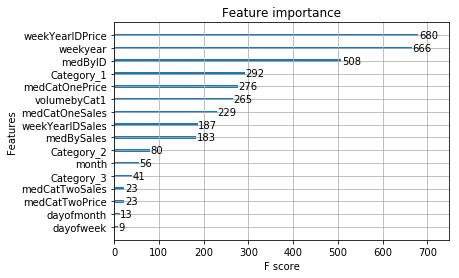

In [65]:
import matplotlib.pyplot as plt
xgb.plot_importance(bst1)
plt.show(2)

In [66]:
bst2 = xgb.train(xgb_params2, dtrain2, 1000, watchlist2, early_stopping_rounds=40, verbose_eval=20)

[0]	train-rmse:4.91066	valid-rmse:4.51377
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 40 rounds.
[20]	train-rmse:0.705507	valid-rmse:0.601525
[40]	train-rmse:0.348147	valid-rmse:0.712026
[60]	train-rmse:0.319166	valid-rmse:0.771304
Stopping. Best iteration:
[22]	train-rmse:0.609672	valid-rmse:0.584732



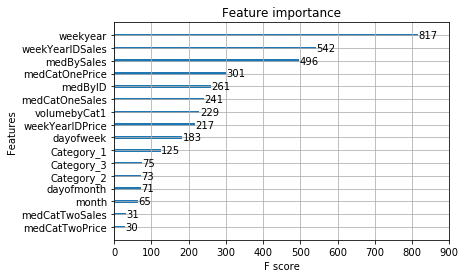

In [67]:
xgb.plot_importance(bst2)
plt.show(2)

In [68]:
bstpred2 = bst2.predict(dtest)
bstpred2 = np.exp(bstpred2)-1
bstpred2 = np.round(bstpred2)

In [95]:
subpy2 = pd.DataFrame({'ID':test['ID'], 'Price':bstpred1, 'Number_Of_Sales':bstpred2})
subpy2.to_csv("subpy2.csv", index=False) #0.97

In [69]:
subpy3 = pd.DataFrame({'ID':test['ID'], 'Price':bstpred1, 'Number_Of_Sales':bstpred2})
subpy3.to_csv("subpy3.csv", index=False) #1

### xgboost on top8 features

In [76]:
feats1 = ['weekYearIDPrice','weekyear','medByID','Category_1','medCatOnePrice','volumebyCat1','medCatOneSales','weekYearIDSales']
feats2 = ['weekYearIDPrice','weekyear','medByID','medBySales','medCatOnePrice','volumebyCat1','medCatOneSales','weekYearIDSales']

In [77]:
dtrain1 = xgb.DMatrix(data=train_X[feats1], label = np.log1p(train_X['Price']))
dvalid1 = xgb.DMatrix(data=valid_X[feats1], label = np.log1p(valid_X['Price']))

dtrain2 = xgb.DMatrix(data=train_X[feats2], label = np.log1p(train_X['Number_Of_Sales']))
dvalid2 = xgb.DMatrix(data=valid_X[feats2], label = np.log1p(valid_X['Number_Of_Sales']))

In [82]:
dtest1 = xgb.DMatrix(data=test[feats1])
dtest2 = xgb.DMatrix(data=test[feats2])

In [78]:
xgb_params1 = {
    'colsample_bytree': 1,
    'subsample': 1,
    'eta': 0.1,
    'objective': 'reg:linear',
    'max_depth': 6,
    'min_child_weight': 10,
    'eval_metric': 'rmse',
    'alpha':8
}

xgb_params2 = {
    'colsample_bytree': 1,
    'subsample': 1,
    'eta': 0.1,
    'objective': 'reg:linear',
    'max_depth': 6,
    'min_child_weight': 0,
    'eval_metric': 'rmse',
    'alpha':8
}
watchlist1  = [ (dtrain1,'train'),(dvalid1,'valid')]
watchlist2  = [ (dtrain2,'train'),(dvalid2,'valid')]


In [79]:
bst1 = xgb.train(xgb_params1, dtrain1, 1000, watchlist1, early_stopping_rounds=40, verbose_eval=20)

[0]	train-rmse:0.979469	valid-rmse:0.957165
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 40 rounds.
[20]	train-rmse:0.199179	valid-rmse:0.247752
[40]	train-rmse:0.146351	valid-rmse:0.255049
[60]	train-rmse:0.136784	valid-rmse:0.277148
Stopping. Best iteration:
[24]	train-rmse:0.175072	valid-rmse:0.240906



In [83]:
bstpred1 = bst1.predict(dtest1)
bstpred1 = np.exp(bstpred1)-1

In [84]:
bst2 = xgb.train(xgb_params2, dtrain2, 1000, watchlist2, early_stopping_rounds=40, verbose_eval=20)

[0]	train-rmse:4.91067	valid-rmse:4.51375
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 40 rounds.
[20]	train-rmse:0.706012	valid-rmse:0.60921
[40]	train-rmse:0.351222	valid-rmse:0.723769
[60]	train-rmse:0.323207	valid-rmse:0.784276
Stopping. Best iteration:
[23]	train-rmse:0.572653	valid-rmse:0.591966



In [85]:
bstpred2 = bst2.predict(dtest2)
bstpred2 = np.exp(bstpred2)-1

In [86]:
subpy4 = pd.DataFrame({'ID':test['ID'], 'Price':bstpred1, 'Number_Of_Sales':bstpred2})
subpy4.to_csv("subpy4.csv", index=False)

### KNN Regression

In [70]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [71]:
knnreg = KNeighborsRegressor(n_neighbors=5)

In [72]:
knnreg.fit(train_X[cols_to_use], np.log1p(train_X['Price']))
knnpred = np.exp(knnreg.predict(valid_X[cols_to_use]))-1
np.sqrt(mean_squared_error(valid_X['Price'], knnpred))

9.1702164211790524

In [73]:
knnreg.fit(train_X[cols_to_use], np.log1p(train_X['Number_Of_Sales']))
knnpred = np.exp(knnreg.predict(valid_X[cols_to_use]))-1
np.sqrt(mean_squared_error(valid_X['Number_Of_Sales'], knnpred))

5585.9881223315542

### Random Forest

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
ranregg = RandomForestRegressor(n_estimators=500, max_depth=6, max_features='auto',min_samples_split=11)

In [105]:
ranregg.fit(train_X[cols_to_use], np.log1p(train_X['Price']))
ranpred = np.exp(ranregg.predict(valid_X[cols_to_use]))-1
np.sqrt(mean_squared_error(valid_X['Price'], ranpred))

7.0996222143230918